***
# Patient Diabetes Predictor using real diabetes data.
***
###### by `Jonathan Molina Rivera`

Using Sklearn we predict whether a patient will develop diabetes or not using real hospital patient data.

## Loading Libraries
We load some of the libraries that we will use in this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## Uploading Dataset
Using pandas we load the dataset for our manipulation.

In [2]:
data = pd.read_csv("./data/pima-data.csv")

### Data Exploration
Before we analyse and engineer the data we must explore and observe it. We must nuderstand what kind of information constitutes the dataset.

In [3]:
data.shape

(768, 10)

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


##### Data legend: 
    - num_preg: Number of preganancies
    - glucose_conc: Glucose concentration (2hr oral gluc tolerance test)
    - diastolic_bp: Diastolic blood presure (mmHg)
    - thickness: skin thickness in tricep fold(mm)
    - bmi: Body Mass Index (kg/hieght)
    - age: years
    - diabetes: True/False

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null bool
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [7]:
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


### Correlations
Getting correlations of each of the features in the dataset.

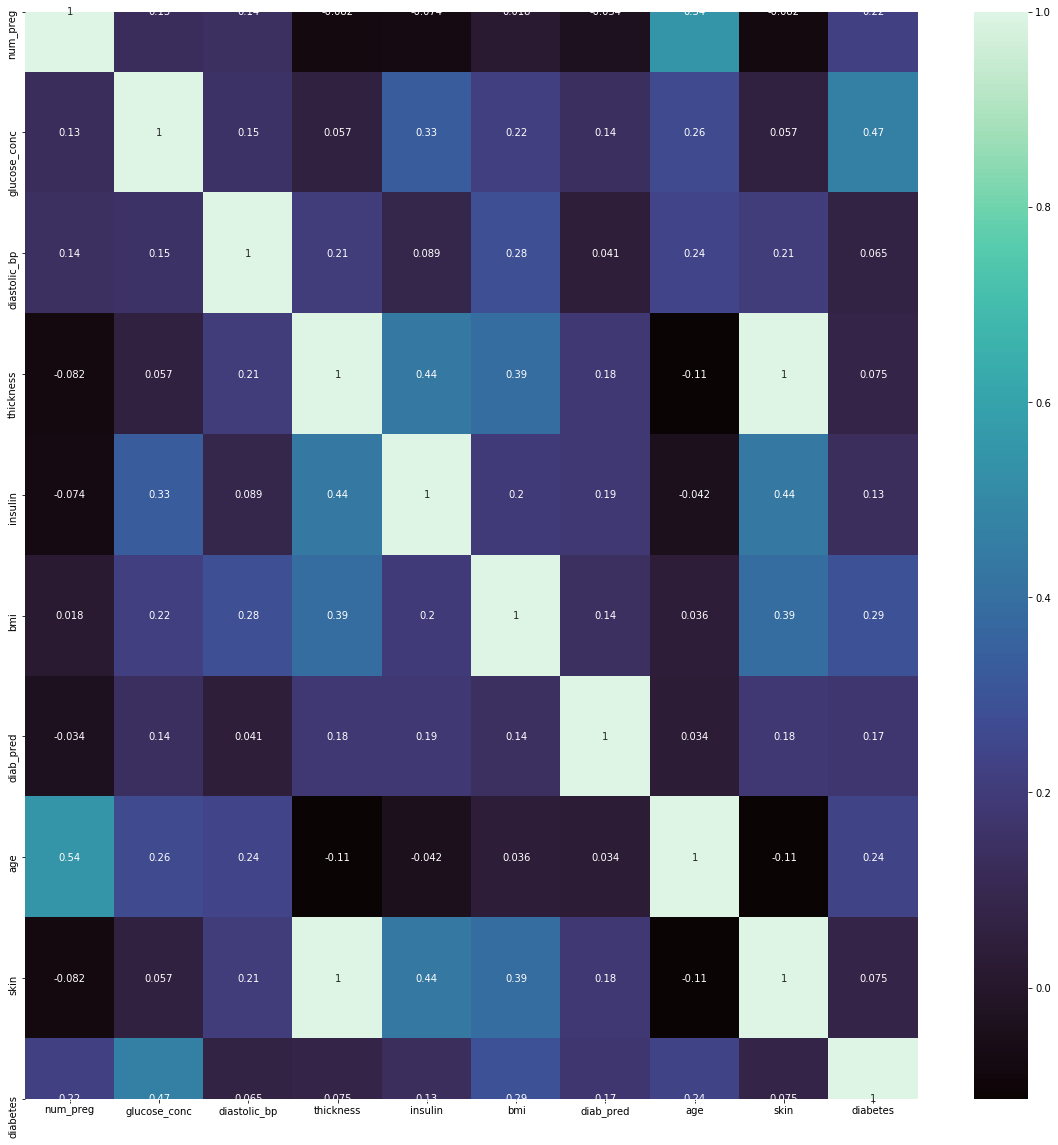

In [8]:
corrmat = data.corr()
corr_features_index = corrmat.index

#plot heat map
plt.figure(figsize=(20,20))
g = sns.heatmap(data[corr_features_index].corr(),annot=True,cmap="mako")

###### **Figure 1.** We use correlation to see what variables are positively and negatively correlated. This helps us adequately select features. 

In [9]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


###### **Figure 2.** Correlation table.

### Changing the diabetes column data from boolean to number (dummy variables).

In [10]:
diabetes_map = {True: 1, False: 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [11]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [12]:
(diabetes_true_count * 100  / 768,diabetes_false_count * 100  / 768)

(34.895833333333336, 65.10416666666667)

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

#independant features
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
X = data[feature_columns].values

#dependant features
predicted_class = ['diabetes']
y = data[predicted_class].values

#Train Test Split Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

### Check how many other missing(zero) values
In a previous section of the notebook we checked if the were any NaN values in the dataset, now we have to check if there are any 0 values in our `independant features`, due to the affects these zero-values may have on our analysis.

In [14]:
print("total number of rows : {0}".format(len(data)))
for col in feature_columns:
    print ( "number of rows missing '" + col + "':  " + "{0}".format(len(data.loc[data[col] == 0])))

total number of rows : 768
number of rows missing 'num_preg':  111
number of rows missing 'glucose_conc':  5
number of rows missing 'diastolic_bp':  35
number of rows missing 'insulin':  374
number of rows missing 'bmi':  11
number of rows missing 'diab_pred':  0
number of rows missing 'age':  0
number of rows missing 'skin':  227


## Imputer
Now that we know that we have a considerable amount of zero-values in the data set we use sklearn's preprocessing Imputer to fill in missing values.

In [15]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

C:\Users\jmoli\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Apply Algorithm

In [16]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

C:\Users\jmoli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [17]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.719


### Hyper Parameter Optimization

In [18]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

### Hyperparameter optimization using RandomizedSearchCV

In [19]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [20]:
classifier=xgboost.XGBClassifier()

In [21]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [22]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [23]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[15:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 7.22 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.0s finished
C:\Users\jmoli\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [24]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [25]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [26]:
classifier.fit(X_train, y_train)

[15:10:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jmoli\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jmoli\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
              subsample=1, tree_method='exact', use_label_encoder=True,
              validate_parameters=1, ...)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print(cm + score)

[[114.71861472  30.71861472]
 [ 35.71861472  52.71861472]]


In [29]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

C:\Users\jmoli\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip

In [30]:
score

array([0.66233766, 0.74025974, 0.72727273, 0.67532468, 0.7012987 ,
       0.74025974, 0.76623377, 0.80519481, 0.77631579, 0.78947368])

In [31]:
score.mean()

0.7383971291866029